# Chains in LangChain

## Outline

* LLMChain
* Sequential Chains
  * SimpleSequentialChain
  * SequentialChain
* Router Chain

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

In [3]:
import os
from openai import AzureOpenAI

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

azure_openai_api_key = os.getenv("AZURE_OPENAI_API_KEY_4")
azure_openai_api_endpoint = os.getenv("AZURE_OPENAI_API_ENDPOINT_4")
deployment_name = os.getenv("AZURE_DEPLOYMENT_NAME_4")

client = AzureOpenAI(
    api_key=azure_openai_api_key,
    api_version="2023-12-01-preview",
    azure_endpoint=azure_openai_api_endpoint
)

Note: LLM's do not always produce the same results. When executing the code in your notebook, you may get slightly different answers that those in the video.

In [4]:
#!pip install pandas

In [5]:
import pandas as pd
df = pd.read_csv('Data.csv')

In [6]:
df.head()

,Product,Review
0,Queen Size Sheet Set,I ordered a king size set. My only criticism w...
1,Waterproof Phone Pouch,"I loved the waterproof sac, although the openi..."
2,Luxury Air Mattress,This mattress had a small hole in the top of i...
3,Pillows Insert,This is the best throw pillow fillers on Amazo...
4,Milk Frother Handheld\n,I loved this product. But they only seem to l...


## LLMChain

In [7]:
from langchain_openai import AzureChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain

In [8]:
llm = AzureChatOpenAI(api_key=azure_openai_api_key,
                        api_version="2023-12-01-preview",
                        azure_endpoint=azure_openai_api_endpoint,
                        model=deployment_name,
                        temperature=0.9
                        )

In [85]:
prompt = ChatPromptTemplate.from_template(
    "What is the single best name to describe \
    a company that makes {product} for {target_user}?"
)

In [86]:
chain = LLMChain(llm=llm, prompt=prompt)

In [87]:
product = "Queen Size Sheet Set"
chain.invoke({"product": product, "target_user": "kids"})

{'product': 'Queen Size Sheet Set',
 'target_user': 'kids',
 'text': '"Dreamy Kids Queen Sheets" might be an excellent name for a company that specializes in Queen Size Sheet Sets for kids. It conveys a sense of comfort and imagination while making it clear that the product is designed specifically for children.'}

### With LangChain Expression Language

In [ ]:
x = 3 if x < 0 else x

In [89]:
from langchain_core.output_parsers import StrOutputParser

chain = prompt | llm

chain.invoke({"product": product, "target_user": "kids"})

'One potential name that captures the essence of a company making Queen Size Sheet Sets for kids could be: "Royal Dreams Kids Bedding." This name conveys the idea of high-quality, comfortable, and child-friendly bedding while also suggesting a touch of whimsy and fantasy fitting for kids.'

## SimpleSequentialChain

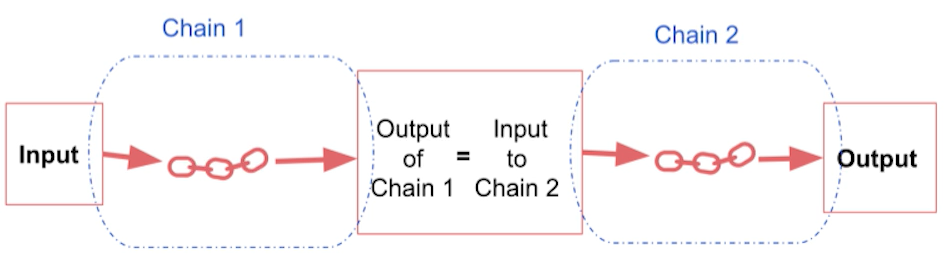

In [26]:
from langchain.chains import SimpleSequentialChain

In [96]:
# llm = ChatOpenAI(temperature=0.9, model=llm_model)

# prompt template 1
first_prompt = ChatPromptTemplate.from_template(
    "What is the single best name to describe \
    a company that makes {product}?"
)

# Chain 1
chain_one = LLMChain(llm=llm, prompt=first_prompt)

In [97]:
# prompt template 2
second_prompt = ChatPromptTemplate.from_template(
    "Write a 20 words description for the following \
    company:{company_name}"
)
# chain 2
chain_two = LLMChain(llm=llm, prompt=second_prompt)

In [98]:
overall_simple_chain = SimpleSequentialChain(chains=[chain_one, chain_two],
                                             verbose=True
                                            )

In [99]:
overall_simple_chain.invoke(product)



> Entering new SimpleSequentialChain chain...
Choosing the best name for a company that makes Queen Size Sheet Sets depends on various factors including your branding strategy, target audience, and overall company vision. Here are a few suggestions that could work well:

1. **Queen Comforts**
2. **Royal Slumber Sheets**
3. **Queenly Linen**
4. **Regal Rest Linens**
5. **CrownSleep Sheets**

Each of these names emphasizes the luxurious and regal feel associated with queen size sheets while being easy to remember and pronounce.
"Queen Comforts offers luxurious, regal queen-size sheet sets, combining elegance and comfort to ensure a royal night's sleep."

> Finished chain.


{'input': 'Queen Size Sheet Set',
 'output': '"Queen Comforts offers luxurious, regal queen-size sheet sets, combining elegance and comfort to ensure a royal night\'s sleep."'}

### With LCEL

In [101]:
# llm = ChatOpenAI(temperature=0.9, model=llm_model)

# prompt template 1
first_prompt = ChatPromptTemplate.from_template(
    "What is the best name to describe \
    a company that makes {product}?"
)

# Chain 1
chain_one = first_prompt | llm

In [102]:
# prompt template 2
second_prompt = ChatPromptTemplate.from_template(
    "Write a 20 words description for the following \
    company:{company_name}"
)
# chain 2
chain_two = second_prompt | llm

In [104]:
from langchain_core.output_parsers import StrOutputParser

overall_simple_chain = chain_one | chain_two

# on pourrait aussi faire :
# overall_simple_chain = first_prompt | llm | second_prompt | llm | StrOutputParser()

overall_simple_chain.invoke(product)

AIMessage(content='"QueenDream Sheets offers luxurious, comfortable, and stylish queen-size bedding. Experience regal rest with our premium quality linens for ultimate relaxation."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 545, 'total_tokens': 572, 'completion_tokens_details': None}, 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_67802d9a6d', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}, id='run-32b4c0bf-2303-46f3-85d1-2b1a3ceddb2b-0', usage_metadata={'input_tokens': 545, 'output_tokens': 27, 'total_tokens': 572})

## SequentialChain

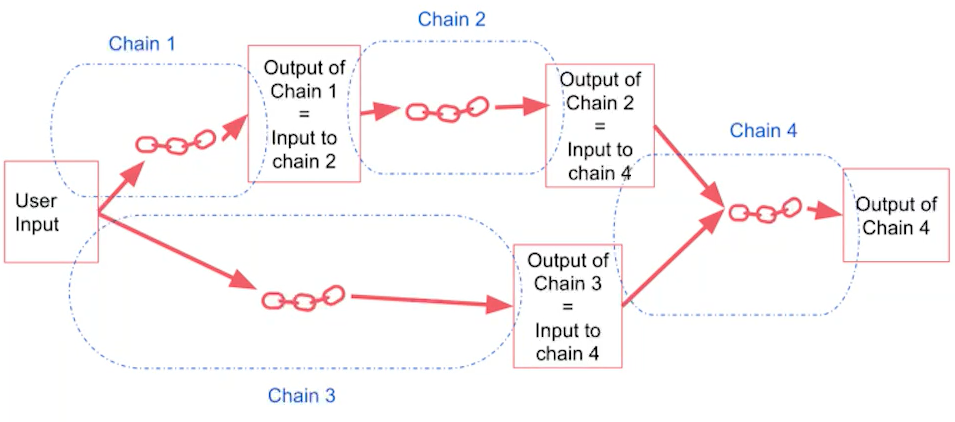

In [54]:
from langchain.chains import SequentialChain

In [106]:
# llm = ChatOpenAI(temperature=0.9, model=llm_model)

# prompt template 1: translate to english
first_prompt = ChatPromptTemplate.from_template(
    "Translate the following review to english:"
    "\n\n{Review}"
)
# chain 1: input= Review and output= English_Review
chain_one = LLMChain(llm=llm, prompt=first_prompt, 
                     output_key="English_Review"
                    )


In [107]:
second_prompt = ChatPromptTemplate.from_template(
    "Can you summarize the following review in 1 sentence:"
    "\n\n{English_Review}"
)
# chain 2: input= English_Review and output= summary
chain_two = LLMChain(llm=llm, prompt=second_prompt, 
                     output_key="summary"
                    )


In [108]:
# prompt template 3: translate to english
third_prompt = ChatPromptTemplate.from_template(
    "What language is the following review:\n\n{Review}"
)
# chain 3: input= Review and output= language
chain_three = LLMChain(llm=llm, prompt=third_prompt,
                       output_key="language"
                      )


In [109]:

# prompt template 4: follow up message
fourth_prompt = ChatPromptTemplate.from_template(
    "Write a follow up response to the following "
    "summary in the specified language:"
    "\n\nSummary: {summary}\n\nLanguage: {language}"
)
# chain 4: input= summary, language and output= followup_message
chain_four = LLMChain(llm=llm, prompt=fourth_prompt,
                      output_key="followup_message"
                     )


In [110]:
# overall_chain: input= Review 
# and output= English_Review,summary, followup_message
overall_chain = SequentialChain(
    chains=[chain_one, chain_two, chain_three, chain_four],
    input_variables=["Review"],
    output_variables=["English_Review", "summary","followup_message"],
    verbose=True
)

In [111]:
review = df.Review[5]
overall_chain(review)



> Entering new SequentialChain chain...

> Finished chain.


{'Review': "Je trouve le goût médiocre. La mousse ne tient pas, c'est bizarre. J'achète les mêmes dans le commerce et le goût est bien meilleur...\nVieux lot ou contrefaçon !?",
 'English_Review': "I find the taste mediocre. The foam doesn't hold, it's strange. I buy the same ones in stores and the taste is much better...\nOld batch or counterfeit!?",
 'summary': 'The reviewer suspects the product may be from an old batch or counterfeit due to its mediocre taste and poor foam quality compared to store-bought versions.',
 'followup_message': "Cher(e) [Nom du critique],\n\nMerci d'avoir partagé votre avis sur notre produit. Nous sommes désolés d'apprendre que vous avez rencontré des problèmes avec la qualité du goût et de la mousse. Nous prenons très au sérieux les préoccupations concernant la fraîcheur de nos produits et l'authenticité de notre marque.\n\nPourriez-vous s'il vous plaît nous fournir plus de détails sur votre achat, comme le numéro de lot ou le lieu d'achat? Cela nous aide

## Router Chain

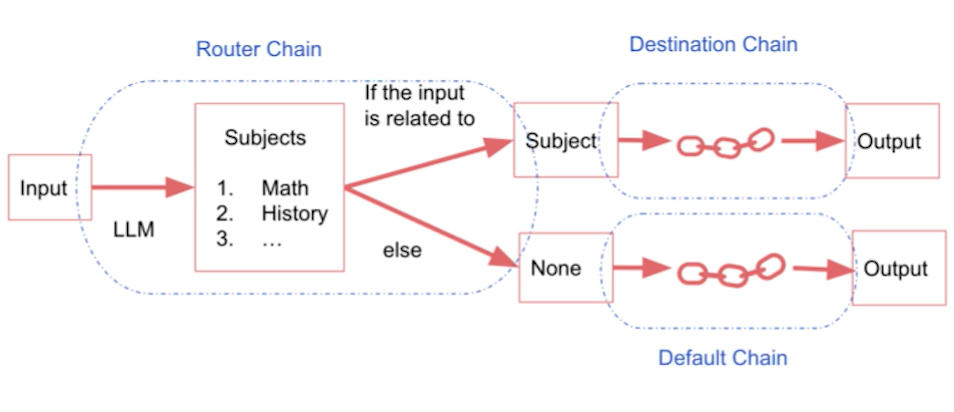

In [61]:
physics_template = """You are a very smart physics professor. \
You are great at answering questions about physics in a concise\
and easy to understand manner. \
When you don't know the answer to a question you admit\
that you don't know.

Here is a question:
{input}"""


math_template = """You are a very good mathematician. \
You are great at answering math questions. \
You are so good because you are able to break down \
hard problems into their component parts, 
answer the component parts, and then put them together\
to answer the broader question.

Here is a question:
{input}"""

history_template = """You are a very good historian. \
You have an excellent knowledge of and understanding of people,\
events and contexts from a range of historical periods. \
You have the ability to think, reflect, debate, discuss and \
evaluate the past. You have a respect for historical evidence\
and the ability to make use of it to support your explanations \
and judgements.

Here is a question:
{input}"""


computerscience_template = """ You are a successful computer scientist.\
You have a passion for creativity, collaboration,\
forward-thinking, confidence, strong problem-solving capabilities,\
understanding of theories and algorithms, and excellent communication \
skills. You are great at answering coding questions. \
You are so good because you know how to solve a problem by \
describing the solution in imperative steps \
that a machine can easily interpret and you know how to \
choose a solution that has a good balance between \
time complexity and space complexity. 

Here is a question:
{input}"""

In [62]:
prompt_infos = [
    {
        "name": "physics", 
        "description": "Good for answering questions about physics", 
        "prompt_template": physics_template
    },
    {
        "name": "math", 
        "description": "Good for answering math questions", 
        "prompt_template": math_template
    },
    {
        "name": "History", 
        "description": "Good for answering history questions", 
        "prompt_template": history_template
    },
    {
        "name": "computer science", 
        "description": "Good for answering computer science questions", 
        "prompt_template": computerscience_template
    }
]

In [63]:
from langchain.chains.router import MultiPromptChain
from langchain.chains.router.llm_router import LLMRouterChain,RouterOutputParser
from langchain.prompts import PromptTemplate

In [ ]:
# llm = ChatOpenAI(temperature=0, model=llm_model)

In [64]:

destination_chains = {}
for p_info in prompt_infos:
    name = p_info["name"]
    prompt_template = p_info["prompt_template"]
    prompt = ChatPromptTemplate.from_template(template=prompt_template)
    chain = LLMChain(llm=llm, prompt=prompt)
    destination_chains[name] = chain  
    
destinations = [f"{p['name']}: {p['description']}" for p in prompt_infos]
destinations_str = "\n".join(destinations)

In [113]:
destination_chains

{'physics': LLMChain(verbose=False, prompt=ChatPromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template="You are a very smart physics professor. You are great at answering questions about physics in a conciseand easy to understand manner. When you don't know the answer to a question you admitthat you don't know.\n\nHere is a question:\n{input}"), additional_kwargs={})]), llm=AzureChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x0000026D1558D940>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x0000026D1558C7D0>, root_client=<openai.lib.azure.AzureOpenAI object at 0x0000026D15573F80>, root_async_client=<openai.lib.azure.AsyncAzureOpenAI object at 0x0000026D1558D9A0>, model_name='gpt-4o-assistant', temperature=0.9, model_kwargs={}, openai_api_key=SecretStr('**********'), disable

In [112]:
destinations_str

'physics: Good for answering questions about physics\nmath: Good for answering math questions\nHistory: Good for answering history questions\ncomputer science: Good for answering computer science questions'

In [65]:
default_prompt = ChatPromptTemplate.from_template("{input}")
default_chain = LLMChain(llm=llm, prompt=default_prompt)

In [79]:
MULTI_PROMPT_ROUTER_TEMPLATE = """Given a raw text input to a \
language model select the model prompt best suited for the input. \
You will be given the names of the available prompts and a \
description of what the prompt is best suited for. \
You may also revise the original input if you think that revising\
it will ultimately lead to a better response from the language model.

<< FORMATTING >>
Return a markdown code snippet with a JSON object formatted to look like:
```json
{{{{
    "destination": string \ name of the prompt to use or "DEFAULT"
    "next_inputs": string \ a potentially modified version of the original input
}}}}
```

REMEMBER: "destination" MUST be one of the candidate prompt \
names specified below OR it can be "DEFAULT" if the input is not\
well suited for any of the candidate prompts.
REMEMBER: "next_inputs" can just be the original input \
if you don't think any modifications are needed.

<< CANDIDATE PROMPTS >>
{destinations}

<< INPUT >>
{{input}}

<< OUTPUT (remember to include the ```json)>>"""

In [80]:
router_template = MULTI_PROMPT_ROUTER_TEMPLATE.format(
    destinations=destinations_str
)
router_prompt = PromptTemplate(
    template=router_template,
    input_variables=["input"],
    output_parser=RouterOutputParser(),
)

router_chain = LLMRouterChain.from_llm(llm, router_prompt)

In [117]:
chain = MultiPromptChain(router_chain=router_chain, 
                         destination_chains=destination_chains, 
                         default_chain=default_chain, verbose=True
                        )

In [118]:
chain.invoke("What is black body radiation?")



> Entering new MultiPromptChain chain...
physics: {'input': 'What is black body radiation?'}
> Finished chain.


{'input': 'What is black body radiation?',
 'text': "Black body radiation refers to the phenomenon where an idealized physical body, known as a black body, absorbs all incident electromagnetic radiation, regardless of frequency or angle of incidence, and re-emits energy perfectly at all wavelengths. This emitted radiation is characteristic of the temperature of the body and does not depend on the material's surface characteristics.\n\nA black body in thermal equilibrium emits electromagnetic radiation called black body radiation, which has a specific spectrum and intensity that depend only on the temperature of the body. The spectrum of this radiation is continuous and follows a distribution described by Planck's law. \n\nKey features of black body radiation include:\n\n1. **Planck's Law:** Describes the intensity of radiation emitted at different wavelengths by a black body at a given temperature.\n2. **Wien's Displacement Law:** States that the wavelength at which the emission of rad

In [73]:
chain.invoke("what is 2 + 2")



> Entering new MultiPromptChain chain...
math: {'input': 'what is 2 + 2'}
> Finished chain.


{'input': 'what is 2 + 2',
 'text': 'Thank you for the kind words! Let\'s break down the question "What is 2 + 2?" into simple steps to make sure we fully understand it.\n\n1. **Identify the numbers involved:**\n   - The first number is 2.\n   - The second number is also 2.\n\n2. **Understand the operation:**\n   - The operation to be performed is addition, which is denoted by the \'+\' sign.\n\n3. **Perform the addition:**\n   - Add the first number (2) to the second number (2).\n\n   \\[\n   2 + 2 = 4\n   \\]\n\nSo, the result of adding 2 and 2 together is 4.'}

In [74]:
chain.invoke("Why does every cell in our body contain DNA?")



> Entering new MultiPromptChain chain...
None: {'input': 'Why does every cell in our body contain DNA?'}
> Finished chain.


{'input': 'Why does every cell in our body contain DNA?',
 'text': "Every cell in our body contains DNA because DNA is the fundamental blueprint that carries the genetic instructions needed for the development, functioning, growth, and reproduction of all living organisms. Here are some key reasons why DNA is present in every cell:\n\n1. **Genetic Instructions**: DNA carries the genetic instructions necessary for building and maintaining an organism. It contains genes, which are segments of DNA that encode for specific proteins. These proteins perform a variety of functions, including acting as enzymes, structural components, and signaling molecules.\n\n2. **Cell Function Regulation**: Each cell in the body uses the DNA to regulate its activities. For instance, different cell types (like muscle cells, nerve cells, and skin cells) express different sets of genes based on their specific functions. The universal presence of DNA ensures that each cell can access the information it needs to

Reminder: Download your notebook to you local computer to save your work.

In [75]:
chain.invoke("Why does every cell in our body contain DNA?")



> Entering new MultiPromptChain chain...
None: {'input': 'Why does every cell in our body contain DNA?'}
> Finished chain.


{'input': 'Why does every cell in our body contain DNA?',
 'text': 'Every cell in our body (with a few exceptions like mature red blood cells) contains DNA because DNA holds the genetic instructions necessary for the development, functioning, growth, and reproduction of all known living organisms, including humans. This genetic information is crucial for several reasons:\n\n1. **Blueprint for Proteins:** DNA contains the instructions for making proteins, which are essential molecules that perform a vast array of functions within organisms. These proteins are involved in virtually every process within a cell, from structural roles to catalyzing biochemical reactions as enzymes.\n\n2. **Cellular Function and Specialization:** Each cell requires specific proteins to function correctly. Though every cell contains the same DNA, different cells express different subsets of genes, enabling them to perform specialized functions. For example, muscle cells produce proteins necessary for contract